##  Data Processing
### Import Packages 

In [37]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Import the train_test_split method
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from imblearn.over_sampling import SMOTE

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Acquire data

In [2]:
file = r'INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls'
original_data= pd.read_excel(file)
original_data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


### Analyze Features by describing data

In [3]:
print(original_data.columns.values) # To find the features present in the data set

['EmpNumber' 'Age' 'Gender' 'EducationBackground' 'MaritalStatus'
 'EmpDepartment' 'EmpJobRole' 'BusinessTravelFrequency' 'DistanceFromHome'
 'EmpEducationLevel' 'EmpEnvironmentSatisfaction' 'EmpHourlyRate'
 'EmpJobInvolvement' 'EmpJobLevel' 'EmpJobSatisfaction'
 'NumCompaniesWorked' 'OverTime' 'EmpLastSalaryHikePercent'
 'EmpRelationshipSatisfaction' 'TotalWorkExperienceInYears'
 'TrainingTimesLastYear' 'EmpWorkLifeBalance'
 'ExperienceYearsAtThisCompany' 'ExperienceYearsInCurrentRole'
 'YearsSinceLastPromotion' 'YearsWithCurrManager' 'Attrition'
 'PerformanceRating']


### Shape of the Data 

it has 28 Features and 1200 employees

In [4]:
original_data.shape  # to find out shape of the data 

(1200, 28)

### Data types of the features

In [5]:
original_data.info() # To know the types of data for each features 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

### Distribution of Categorical features

In [6]:
original_data.describe(include=['O']) # To see the Distribution of Categorical features

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001821,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


###  Distribution of Numerical features


In [7]:
original_data.describe() # To know the max , min, std of values 

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


### Data Cleaning 

In [8]:
original_data.isna().values.any() # To find out NaN values 

False

In [9]:
original_data.isnull().values.any() # To find out Null values 

False

There is no NaN or Null values present in the Data Set 

## 1.Distribution of the dataset
---
In general, one of the first few steps in exploring the data would be to have a rough idea of how the features are distributed with one another. To do so, we shall invoke the familiar kdeplot function from the Seaborn plotting library. The distribution has been done by both numerical and categorical features. it will show the overall idea about the density and majority of data present in a different level.



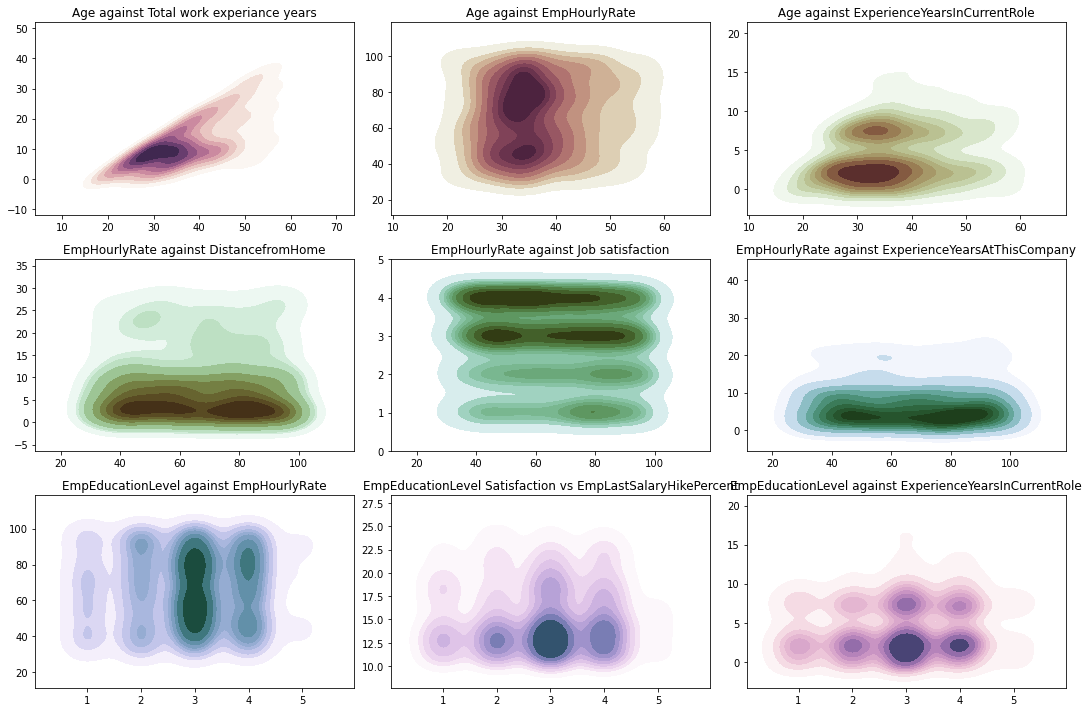

In [10]:
# Plotting the KDEplots
f, axes = plt.subplots(3, 3, figsize=(15, 10), 
                       sharex=False, sharey=False)

# Defining our colormap scheme
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Generate and plot
x = original_data['Age'].values
y = original_data['TotalWorkExperienceInYears'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = 'Age against Total work experiance years')

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# Generate and plot
x = original_data['Age'].values
y = original_data['EmpHourlyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = 'Age against EmpHourlyRate')

cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
# Generate and plot
x = original_data['Age'].values
y = original_data['ExperienceYearsInCurrentRole'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set( title = ' Age against ExperienceYearsInCurrentRole ')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Generate and plot
x = original_data['EmpHourlyRate'].values
y = original_data['DistanceFromHome'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,0])
axes[1,0].set( title = 'EmpHourlyRate against DistancefromHome')

cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
# Generate and plot
x = original_data['EmpHourlyRate'].values
y = original_data['EmpJobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set( title = 'EmpHourlyRate against Job satisfaction')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# Generate and plot
x = original_data['EmpHourlyRate'].values
y = original_data['ExperienceYearsAtThisCompany'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,2])
axes[1,2].set( title = 'EmpHourlyRate against ExperienceYearsAtThisCompany')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# Generate and plot
x = original_data['EmpEducationLevel'].values
y = original_data['EmpHourlyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,0])
axes[2,0].set( title = 'EmpEducationLevel against EmpHourlyRate')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# Generate and plot
x = original_data['EmpEducationLevel'].values
y = original_data['EmpLastSalaryHikePercent'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,1])
axes[2,1].set( title = 'EmpEducationLevel Satisfaction vs EmpLastSalaryHikePercent')

cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# Generate and plot
x = original_data['EmpEducationLevel'].values
y = original_data['ExperienceYearsInCurrentRole'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,2])
axes[2,2].set( title = 'EmpEducationLevel against ExperienceYearsInCurrentRole')

f.tight_layout()

### Distribution of Numerical Features
---
This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.the distribution can be derived or visualized using the density map between the numerical or categorical features present in the data. 

- The age distribution is starting from 18 to 60 where the most of the employees are lying between **30 to 40** age count.
- The distance from home to office is distributing from 0 unit to 30 unit which can be kilometre or mile. The most of the employees are coming from the range of 0 to 5 units.
- Employees are worked in the multiple companies up to **8** companies where most of the employees worked up to **2** companies before getting to work here.
- The hourly rate range is **65 to 95** for majority employees work in this company.
- In General, Most of Employees work up to **5** years in this company.
- Most of the employees get 11%  to 15% of salary hike in this company.

### Distribution of Categorical Features
---
- The Gender variance is divided by **60%** of Male employees and **40%** of Female employees in the company. 
- The number of the educational backgrounds present in the employees is **six** unique backgrounds.
- nineteen unique employee job roles are present in this company.
- The most of the employees are having the education level of **3**
- The Job satisfaction level in this company is high level for the majority of employees.
- The **85%** of employees are not having attrition in their work
- only **11%** of employees in the company were achieved **level 4** - performance rating 
- The overall percentage of employees doing overtime is **30%**

## 2. Correlation of Features
---
The next tool in a data explorer's arsenal is that of a correlation matrix. By plotting a correlation matrix, we have a very nice overview of how the features are related to one another. For a Pandas data frame, we can conveniently use the call .corr which by default provides the Pearson Correlation values of the columns pairwise in that data frame. The correlation works bet for numerical data where we are going to use all the numerical features present in the data. 

In [15]:
# creating a list of only numerical values
numerical = [u'Age', u'DistanceFromHome', u'EmpEducationLevel', u'EmpEnvironmentSatisfaction', u'EmpHourlyRate'
 , u'EmpJobInvolvement', u'EmpJobLevel', u'EmpJobSatisfaction'
 , u'NumCompaniesWorked', u'EmpLastSalaryHikePercent'
 , u'EmpRelationshipSatisfaction', u'TotalWorkExperienceInYears'
 , u'TrainingTimesLastYear', u'EmpWorkLifeBalance'
 , u'ExperienceYearsAtThisCompany', u'ExperienceYearsInCurrentRole'
 , u'YearsSinceLastPromotion', u'YearsWithCurrManager'
 , u'PerformanceRating']

data = [go.Heatmap(
        z=original_data[numerical].astype(float).corr().values, # Generating the Pearson correlation
        x=original_data[numerical].columns.values,
        y=original_data[numerical].columns.values,
        colorscale='Viridis',
        reversescale=False,
        text=original_data[numerical].astype(float).corr().values,  # Set text to correlation values
        opacity=1.0
    )
]



layout = go.Layout(
    title='Pearson Correlation for Numerical Features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 800, height = 700,
    
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

   
From the above Pearson correlation heat plot, we can be to see that correlation between features with numerical values in the dataset. The heat signatures show the level of correlation from 0 to 1. from this distribution we can derive the facts as follows, 

- The Total years of experience and job level are having the higher correlation when comparing to all features.

- Experience years at this company and years with the current manager has the second higher relation between these features.

- Experience years at this company and experience in the current role makes the sense of correlation.

- People who have more experience with the company has the more probability to get the promotion from the correlation between them.

- In this plot, the age has the important role in the total number of work experience of an employee where it is a universal truth.

## One hot encoding for categorial features 

In [17]:
# Empty list to store columns with categorical data
categorical = []
for col, value in original_data.iteritems():
    if value.dtype == 'object':
        categorical.append(col)

# Store the numerical columns in a list numerical
numerical = original_data.columns.difference(categorical)

In [18]:
# Store the categorical data in a dataframe called attrition_cat
original_cat = original_data[categorical]
original_cat = original_cat.drop(['EmpNumber'], axis=1) 

In [19]:
original_cat = pd.get_dummies(original_cat)
original_cat.head(3)


,Gender_Female,Gender_Male,EducationBackground_Human Resources,EducationBackground_Life Sciences,EducationBackground_Marketing,EducationBackground_Medical,EducationBackground_Other,EducationBackground_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,...,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Non-Travel,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely,OverTime_No,OverTime_Yes,Attrition_No,Attrition_Yes
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
2,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,1,0


## Creating new features from Numerical data

In [20]:
# Store the numerical features to a dataframe attrition_num
original_num = original_data[numerical]
original_num = original_num.drop(['PerformanceRating'], axis=1) # To remove the target column PerformanceRating 

In [21]:
# Concat the two dataframes together columnwise
original_final = pd.concat([original_num, original_cat], axis=1)
original_final.head(3)

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,...,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Non-Travel,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely,OverTime_No,OverTime_Yes,Attrition_No,Attrition_Yes
0,32,10,3,4,55,3,2,4,12,4,...,0,0,0,0,0,1,1,0,1,0
1,47,14,4,4,42,3,2,1,12,4,...,0,0,0,0,0,1,1,0,1,0
2,40,5,4,4,48,2,3,1,21,3,...,0,0,0,0,1,0,0,1,1,0


# Implementing Machine Learning Models
---

Having performed some exploratory data analysis and simple feature engineering as well as having ensured that all categorical values are encoded, we are now ready to proceed onto building our models.

As alluded to in the introduction of this notebook, we will aim to evaluate and contrast the performances of a handful of different learning models.


### Splitting Data into Train and Test sets
---
But before we even start training a model, we will have to partition our dataset into a training set and a test set (unlike Kaggle competitions where the train and test data are already segregated for you). To split our data we will utilise sklearn's

In [25]:
target = original_data.loc[:,['PerformanceRating']] # Target Performance Rating 

# Split data into train and test sets as well as for validation and testing
train, test, target_train, target_test = train_test_split(original_final, target, train_size= 0.75,random_state=0);


### SMOTE to oversample due to the skewness in target
---

Since we have already noted the severe imbalance in the values within the target variable, let us implement the SMOTE method in the dealing with this skewed value via the imblearn Python package.

In [31]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(train, target_train)


# A. Random Forest Classifier
---
The Random Forest method, first introduced by Breiman in 2001 can be grouped under the category of ensemble models. Why ensemble? The building block of a Random Forest is the ubiquitous Decision Tree. The decision tree as a standalone model is often considered a "weak learner" as its predictive performance is relatively poor. However a Random Forest gathers a group (or ensemble) of decision trees and uses their combined predictive capabilities to obtain relatively strong predictive performance - "strong learner".

This principle of using a collection of "weak learners" to come together to create a "strong learner" underpins the basis of ensemble methods which one regularly comes across in Machine learning. For a really good read that drives home the basics of the Random Forest, refer to this CitizenNet blog

#### Initialising Random Forest parameters
---
We will utilise the Scikit-learn library to construct a Random Forest model. To do so, we have to first define our set of parameters that we will feed into our Random Forest classifier as follows

In [32]:
seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 800,
    'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 9,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [33]:
rf = RandomForestClassifier(**rf_params)

In [34]:
rf.fit(smote_train, smote_target)
print("Fitting of Random Forest as finished")

Fitting of Random Forest as finished


In [35]:
rf_predictions = rf.predict(test)
print("Predictions finished")


display(rf_predictions)
display(target_test)

Predictions finished


array([3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 4, 3, 3, 4, 2, 3, 2, 3, 3, 2, 4,
       3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 4,
       2, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 4, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 4, 3, 3,
       3, 3, 4, 3, 3, 3, 4, 2, 3, 3, 3, 3, 3, 3, 3, 4, 2, 3, 2, 3, 3, 4,
       3, 4, 3, 4, 2, 3, 2, 3, 3, 3, 4, 3, 4, 2, 3, 3, 3, 3, 3, 3, 4, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 2, 3, 3, 4, 2, 3, 2, 3, 3, 3, 4, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       4, 3, 3, 3, 3, 3, 4, 3, 4, 3, 4, 3, 3, 3, 3, 2, 4, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 2, 2, 4, 2, 3, 3, 2, 3, 3, 3, 3, 3, 4, 3, 3, 3,
       2, 4, 3, 2, 2, 3, 3, 3, 4, 2, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 4, 2, 3, 3, 3, 2, 2, 3, 4, 3, 4, 4], d

,PerformanceRating
198,3
328,3
45,3
263,3
621,3
...,...
668,3
839,3
117,3
359,4


## Accuracy score
---

In [38]:
accuracy_score(target_test, rf_predictions) # To find the accuracy of the Prediction Model 

0.9133333333333333

# B. Gradient Boosted Classifier
---
Gradient Boosting is also an ensemble technique much like the Random Forest where a combination of weak Tree learners are brought together to form a relatively stronger learner. The technique involves defining some sort of function (loss function) that you want minimised and an method/algorithm to minimise this. Therefore as the name suggests, the algorithm used to minimise the loss function is that of a gradient descent method which adds decision trees which "point" in the direction that reduces our loss function (downward gradient).

To set up a Gradient Boosting classifier is easy enough in Sklearn and it involves only a handful of lines of code. Again we first set up our classifier's parameters

### Initialising Gradient Boosting Parameters
---
In general there are a handful of key parameter when setting up tree-based or gradient boosted models. These are always going to be the number of estimators, the maximum depth with which you want your model to be trained to, and the minimum samples per leaf

In [39]:
# Gradient Boosting Parameters
gb_params ={
    'n_estimators': 500,
    'max_features': 0.9,
    'learning_rate' : 0.2,
    'max_depth': 11,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [40]:
gb = GradientBoostingClassifier(**gb_params)
# Fit the model to our SMOTEd train and target
gb.fit(smote_train, smote_target)
# Get our predictions
gb_predictions = gb.predict(test)
print("Predictions have finished")

Predictions have finished


## Accuracy score

In [41]:
accuracy_score(target_test, gb_predictions)

0.9

# Visualization
---

# 1. Top 3 Important Factors effecting employee performance

In [44]:
# Empty list to store columns with categorical data
categorical = []
for col, value in original_data.iteritems():
    if value.dtype == 'object':
        categorical.append(col)

# Store the numerical columns in a list numerical
numerical = original_data.columns.difference(categorical)

# Store the categorical data in a dataframe called attrition_cat
original_cat = original_data[categorical]
original_cat = original_cat.drop(['EmpNumber'], axis=1) 
original_cat = pd.get_dummies(original_cat)

# Store the numerical features to a dataframe attrition_num
original_num = original_data[numerical]
original_num = original_num.drop(['PerformanceRating'], axis=1) # To remove the target column PerformanceRating 

# Concat the two dataframes together columnwise
original_final = pd.concat([original_num, original_cat], axis=1)

# Import the train_test_split method
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit


target = original_data.loc[:,['PerformanceRating']] # Target Performance Rating 


# Split data into train and test sets as well as for validation and testing
train, test, target_train, target_test = train_test_split(original_final, target, train_size= 0.75,random_state=0);
#train, test, target_train, target_val = StratifiedShuffleSplit(attrition_final, target, random_state=0);

from imblearn.over_sampling import SMOTE

oversampler = SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(train, target_train)

seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 800,
    'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 9,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

rf = RandomForestClassifier(**rf_params)

rf.fit(smote_train, smote_target)


rf_predictions = rf.predict(test)


## Feature Ranking via the Random Forest
---
The Random Forest classifier in Sklearn also contains a very convenient and most useful attribute featureimportances which tells us which features within our dataset has been given most importance through the Random Forest algorithm. Shown below is an Interactive Plotly diagram of the various feature importances.

In [45]:
# Scatter plot 
trace = go.Scatter(
    y = rf.feature_importances_,
    x = original_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = original_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance Level',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

### Most RF important features : Employment environtmnet satisfaction, emp salery hike , years since last promation
---
As observed in the plot of feature importances, it seems that our Random Forest Classifier has decided to rank the features of OverTime highest, which is followed by marital status.

I don't know about you, but working overtime to me does indeed affect my satisfaction derived from any job (and I have worked many an overtime). Maybe then it should come as no surprise that our classifier has caught on to this and thus ranked overtime the highest.

# B. Gradient Boosted Classifier
---

In [46]:
# Gradient Boosting Parameters
gb_params ={
    'n_estimators': 500,
    'max_features': 0.9,
    'learning_rate' : 0.2,
    'max_depth': 11,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

gb = GradientBoostingClassifier(**gb_params)
# Fit the model to our SMOTEd train and target
gb.fit(smote_train, smote_target)
# Get our predictions
gb_predictions = gb.predict(test)


## Feature Ranking via the Gradient Boosting Model
---
Much like the Random Forest, we can invoke the featureimportances attribute of the gradient boosting model and dump it in an interactive Plotly chart

In [47]:
# Scatter plot 
trace = go.Scatter(
    y = gb.feature_importances_,
    x = original_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = gb.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = original_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Model Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance Level',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter')

# 2.Department wise performances

In department wise performance,  we have to analyze the data by each department present in the category. The data frame has to be separated or sliced according to department wise. 

In Employee department feature there are six departments available. 
- Sales 
- Human Resoruces 
- Development 
- Data Science 
- Reserch & Devlopment 
-  Finace 

## Sales Department 

In [48]:
sales = original_data[original_data.EmpDepartment == 'Sales'] # Slicing the all coloums of Sales Row 
sales.head(1)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3


###  (i) Performance Rating with respect to number of employees

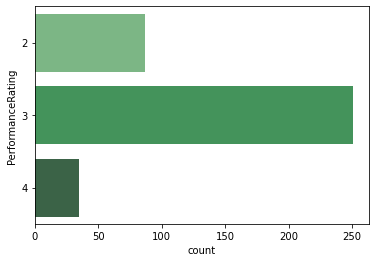

In [49]:
sns.countplot(y="PerformanceRating", data=sales, palette="Greens_d");

###  (ii) Performance Rating with respect to Age Group

<AxesSubplot:xlabel='PerformanceRating', ylabel='Age'>

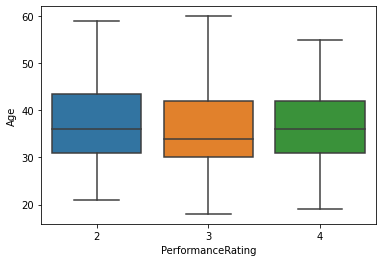

In [50]:
sns.boxplot(sales['PerformanceRating'], sales['Age'])

### (iii) Performance based on Gender

<AxesSubplot:xlabel='Gender', ylabel='PerformanceRating'>

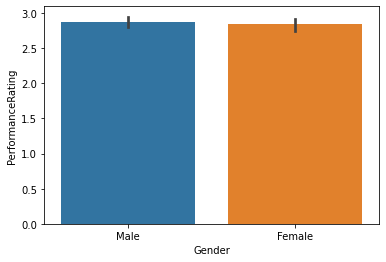

In [52]:
sns.barplot(sales['Gender'], sales['PerformanceRating'])

### (iv) Performance According to the Experience Level

In [53]:
data = [
    {
        'x': sales['TotalWorkExperienceInYears'],
        'y': sales['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':sales['ExperienceYearsAtThisCompany'],
        'y':sales['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': sales['ExperienceYearsInCurrentRole'],
        'y': sales['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - Sales',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

## Human Resoruces Department 
---

In [54]:
HR = original_data[original_data.EmpDepartment == 'Human Resources'] # Slicing the all coloums of Sales Row 
HR.head(3)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
16,E1001038,39,Female,Human Resources,Married,Human Resources,Human Resources,Travel_Rarely,3,3,...,3,12,3,1,8,3,3,6,No,3
58,E1001107,36,Male,Human Resources,Married,Human Resources,Human Resources,Travel_Rarely,13,3,...,2,8,2,3,5,2,0,4,No,3


###  (i) Performance Rating with respect to number of employees

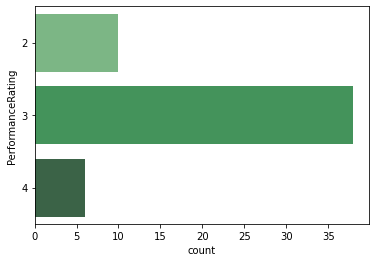

In [55]:
sns.countplot(y="PerformanceRating", data=HR, palette="Greens_d");

###  (ii) Performance Rating with respect to Age Group

<AxesSubplot:xlabel='PerformanceRating', ylabel='Age'>

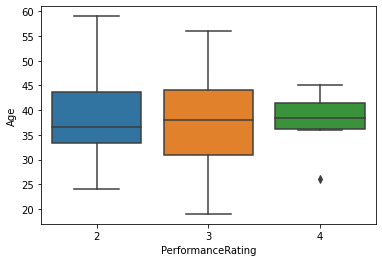

In [56]:
sns.boxplot(HR['PerformanceRating'], HR['Age'])

### (iii) Performance based on Gender

<AxesSubplot:xlabel='Gender', ylabel='PerformanceRating'>

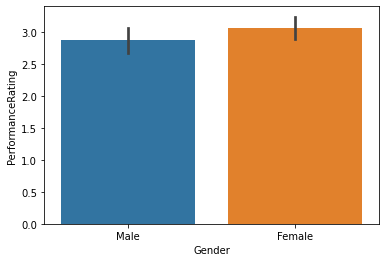

In [57]:
sns.barplot(HR['Gender'], HR['PerformanceRating'])

### (iv) Performance According to the Experience Level

In [58]:
data = [
    {
        'x': HR['TotalWorkExperienceInYears'],
        'y': HR['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':HR['ExperienceYearsAtThisCompany'],
        'y':HR['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': HR['ExperienceYearsInCurrentRole'],
        'y': HR['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - HR ',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

## Development Department 
---

In [59]:
Development = original_data[original_data.EmpDepartment == 'Development'] # Slicing the all coloums of Sales Row 
Development.head(3)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
5,E1001011,27,Male,Life Sciences,Divorced,Development,Developer,Travel_Frequently,10,2,...,3,9,4,2,9,7,1,7,No,4
7,E1001019,28,Female,Life Sciences,Single,Development,Developer,Travel_Rarely,1,2,...,4,10,4,3,7,7,3,7,Yes,3
8,E1001020,36,Female,Life Sciences,Married,Development,Developer,Non-Travel,8,3,...,1,10,2,3,8,7,0,5,No,3


###  (i) Performance Rating with respect to number of employees

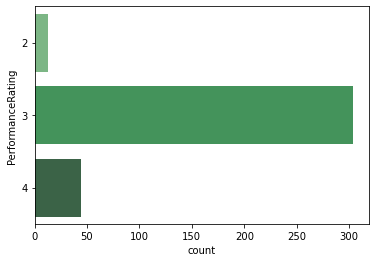

In [60]:
sns.countplot(y="PerformanceRating", data=Development, palette="Greens_d");

###  (ii) Performance Rating with respect to Age Group

<AxesSubplot:xlabel='PerformanceRating', ylabel='Age'>

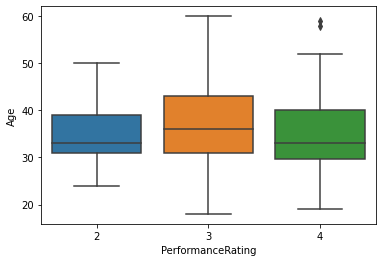

In [61]:
sns.boxplot(Development['PerformanceRating'], Development['Age'])

### (iii) Performance based on Gender

<AxesSubplot:xlabel='Gender', ylabel='PerformanceRating'>

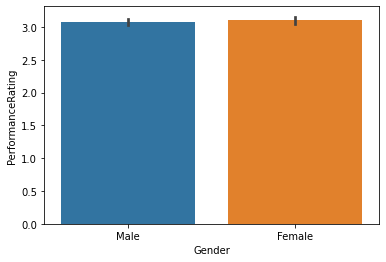

In [62]:
sns.barplot(Development['Gender'], Development['PerformanceRating'])

### (iv) Performance According to the Experience Level

In [63]:
data = [
    {
        'x': Development['TotalWorkExperienceInYears'],
        'y': Development['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':Development['ExperienceYearsAtThisCompany'],
        'y':Development['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': Development['ExperienceYearsInCurrentRole'],
        'y': Development['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - Development ',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

## Data Science Department 
---

In [64]:
Data_Science = original_data[original_data.EmpDepartment == 'Data Science'] # Slicing the all coloums of Sales Row 
Data_Science.head(3)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
89,E1001165,49,Female,Technical Degree,Married,Data Science,Data Scientist,Travel_Rarely,1,3,...,2,7,2,3,4,2,0,2,No,3
107,E1001201,21,Female,Other,Single,Data Science,Data Scientist,Travel_Rarely,18,1,...,1,1,3,2,1,0,0,0,Yes,3
108,E1001202,36,Male,Life Sciences,Married,Data Science,Data Scientist,Travel_Rarely,14,1,...,1,17,2,2,16,8,4,11,No,3


###  (i) Performance Rating with respect to number of employees

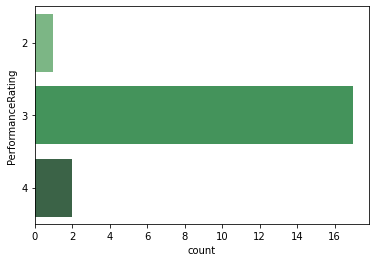

In [66]:
sns.countplot(y="PerformanceRating", data=Data_Science, palette="Greens_d");

###  (ii) Performance Rating with respect to Age Group

<AxesSubplot:xlabel='PerformanceRating', ylabel='Age'>

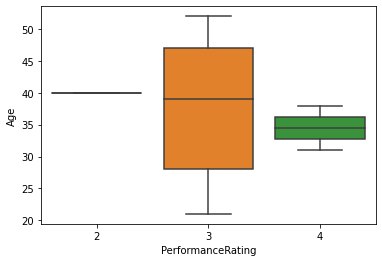

In [67]:
sns.boxplot(Data_Science['PerformanceRating'], Data_Science['Age'])

### (iii) Performance based on Gender

<AxesSubplot:xlabel='Gender', ylabel='PerformanceRating'>

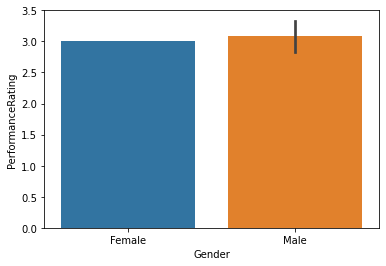

In [70]:
sns.barplot(Data_Science['Gender'], Data_Science['PerformanceRating'])

### (iv) Performance According to the Experience Level

In [71]:
data = [
    {
        'x': Data_Science['TotalWorkExperienceInYears'],
        'y': Data_Science['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':Data_Science['ExperienceYearsAtThisCompany'],
        'y':Data_Science['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': Data_Science['ExperienceYearsInCurrentRole'],
        'y': Data_Science['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - Data Science ',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

## Research & Development Department 
---

In [72]:
RD = original_data[original_data.EmpDepartment == 'Research & Development'] # Slicing the all coloums of Sales Row 
RD.head(3)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
156,E1001284,38,Male,Medical,Married,Research & Development,Senior Manager R&D,Travel_Frequently,10,1,...,2,3,0,2,2,1,0,2,No,3
157,E1001288,35,Male,Other,Divorced,Research & Development,Laboratory Technician,Travel_Rarely,14,4,...,4,5,2,1,4,2,0,2,Yes,3
158,E1001289,31,Female,Life Sciences,Married,Research & Development,Manufacturing Director,Travel_Frequently,1,1,...,3,4,1,3,4,3,0,3,No,3


###  (i) Performance Rating with respect to number of employees

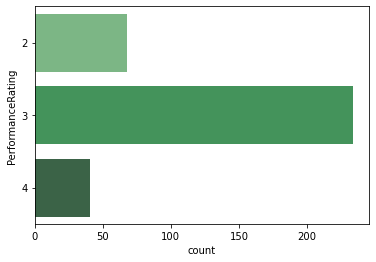

In [73]:
sns.countplot(y="PerformanceRating", data=RD, palette="Greens_d");

###  (ii) Performance Rating with respect to Age Group

<AxesSubplot:xlabel='PerformanceRating', ylabel='Age'>

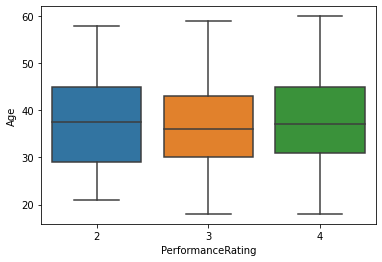

In [74]:
sns.boxplot(RD['PerformanceRating'], RD['Age'])

### (iv) Performance According to the Experience Level

In [75]:
data = [
    {
        'x': RD['TotalWorkExperienceInYears'],
        'y': RD['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':RD['ExperienceYearsAtThisCompany'],
        'y':RD['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': RD['ExperienceYearsInCurrentRole'],
        'y': RD['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - R & D',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

## Finance Department 
---

In [76]:
Finance = original_data[original_data.EmpDepartment == 'Finance'] # Slicing the all coloums of Sales Row 
Finance.head(3)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
482,E1001868,29,Male,Life Sciences,Divorced,Finance,Finance Manager,Travel_Frequently,2,1,...,4,6,0,4,6,4,1,3,No,2
484,E1001870,23,Male,Technical Degree,Married,Finance,Finance Manager,Travel_Rarely,10,3,...,4,4,2,3,2,2,2,2,No,3
485,E1001874,35,Male,Life Sciences,Married,Finance,Finance Manager,Travel_Rarely,28,3,...,4,10,3,2,10,9,6,8,No,2


###  (i) Performance Rating with respect to number of employees

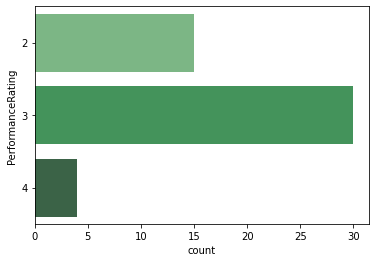

In [77]:
sns.countplot(y="PerformanceRating", data=Finance, palette="Greens_d");

###  (ii) Performance Rating with respect to Age Group

<AxesSubplot:xlabel='PerformanceRating', ylabel='Age'>

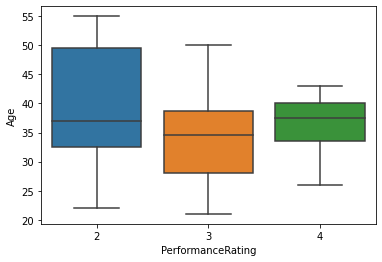

In [78]:
sns.boxplot(Finance['PerformanceRating'], Finance['Age'])

### (iii) Performance based on Gender

<AxesSubplot:xlabel='Gender', ylabel='PerformanceRating'>

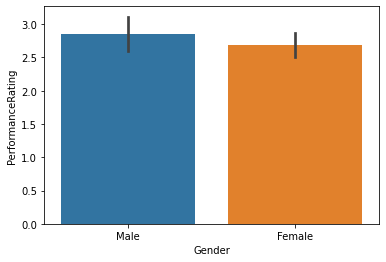

In [79]:
sns.barplot(Finance['Gender'], Finance['PerformanceRating'])

### (iv) Performance According to the Experience Level

In [80]:
data = [
    {
        'x': Finance['TotalWorkExperienceInYears'],
        'y': Finance['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':Finance['ExperienceYearsAtThisCompany'],
        'y':Finance['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': Finance['ExperienceYearsInCurrentRole'],
        'y': Finance['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - Finance ',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)